<a href="https://colab.research.google.com/github/serendipity-sd/MachineHack/blob/master/Week_8_Rank_2_Mrutyunjaya_Rath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os 
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
drive.mount("/content/gdrive/", force_remount=True)
os.chdir('gdrive/')


Mounted at /content/gdrive/


In [3]:
os.chdir('My Drive')

In [4]:
os.chdir("MachineHack_Hackathon_Solutions_Ecommerce_Price_Prediction_Weekend_Hackathon_8")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()

'/content/gdrive/My Drive/MachineHack_Hackathon_Solutions_Ecommerce_Price_Prediction_Weekend_Hackathon_8'

In [6]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
submission=pd.read_excel('sub.xlsx')

In [7]:
train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


In [8]:
test.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date
0,P-11284,B-2984,computers,network components,routers,4.3,1/12/2018
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.0,20/12/2012
2,P-5843,B-3078,clothing,women s clothing,western wear,1.5,1/12/2014
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.9,1/12/2019
4,P-5586,B-3078,clothing,women s clothing,western wear,1.4,1/12/2017


In [9]:
submission.head()

,Selling_Price
0,2985.101132
1,542.891234
2,712.253540
3,340.579204
4,676.768173


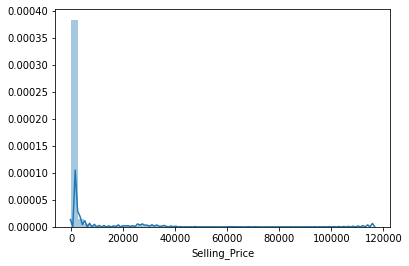

In [10]:
sns.distplot(train['Selling_Price'])

### The Target Variable is highly skewed. So we are going to normalize it by applying log transformation through np.log1p

In [11]:
train['Selling_Price']=np.log1p(train['Selling_Price'])

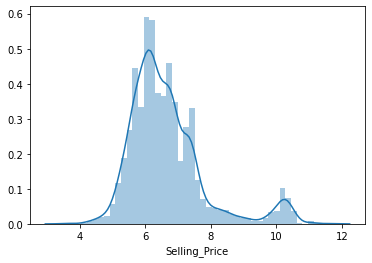

In [12]:
sns.distplot(train['Selling_Price'])

In [13]:
train.describe()

,Item_Rating,Selling_Price
count,2452.000000,2452.000000
mean,3.078467,6.652575
std,1.187137,1.177109
min,1.000000,3.526361
25%,2.000000,5.918894
50%,3.100000,6.391917
75%,4.100000,7.086947
max,5.000000,11.663842


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        2452 non-null   object 
 1   Product_Brand  2452 non-null   object 
 2   Item_Category  2452 non-null   object 
 3   Subcategory_1  2452 non-null   object 
 4   Subcategory_2  2452 non-null   object 
 5   Item_Rating    2452 non-null   float64
 6   Date           2452 non-null   object 
 7   Selling_Price  2452 non-null   float64
dtypes: float64(2), object(6)
memory usage: 153.4+ KB


In [15]:
train.nunique()

Product          2452
Product_Brand    1010
Item_Category      75
Subcategory_1     130
Subcategory_2     336
Item_Rating        41
Date              483
Selling_Price    1095
dtype: int64

In [16]:
train.shape

(2452, 8)

In [17]:
train[(train['Product_Brand']=='B-3078')]['Item_Category'].nunique()

13

In [18]:
# Extracting Date features 
def extract_time_features(df):
    df['Date']=pd.to_datetime(df['Date'])
    #df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    #df['day_of_week'] = df['Date'].dt.dayofweek
    df['Day'] = df['Date'].dt.day
    df['DayOfyear'] = df['Date'].dt.dayofyear
    df['Week'] = pd.to_datetime(df['Date']).dt.week 
    df['Quarter'] = pd.to_datetime(df['Date']).dt.quarter  
    df['Is_month_start'] = pd.to_datetime(df['Date']).dt.is_month_start 
    df['Is_month_end'] = pd.to_datetime(df['Date']).dt.is_month_end 
    del df['Date']
    return df

In [19]:
train=extract_time_features(train)
test=extract_time_features(test)

In [20]:
train['Unique_Item_category_per_product_brand']=train.groupby(['Product_Brand'])['Item_Category'].transform('nunique')
train['Unique_Subcategory_1_per_product_brand']=train.groupby(['Product_Brand'])['Subcategory_1'].transform('nunique')
train['Unique_Subcategory_2_per_product_brand']=train.groupby(['Product_Brand'])['Subcategory_2'].transform('nunique')

In [21]:
train.shape

(2452, 17)

In [22]:
test['Unique_Item_category_per_product_brand']=test.groupby(['Product_Brand'])['Item_Category'].transform('nunique')
test['Unique_Subcategory_1_per_product_brand']=test.groupby(['Product_Brand'])['Subcategory_1'].transform('nunique')
test['Unique_Subcategory_2_per_product_brand']=test.groupby(['Product_Brand'])['Subcategory_2'].transform('nunique')

In [23]:
train.shape

(2452, 17)

In [24]:
train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,month,Day,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Unique_Item_category_per_product_brand,Unique_Subcategory_1_per_product_brand,Unique_Subcategory_2_per_product_brand
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,5.676754,2,3,34,5,1,False,False,1,1,1
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,6.800170,7,1,182,27,3,True,False,13,29,100
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,6.675823,1,12,12,2,1,False,False,1,1,1
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,6.731018,12,12,346,50,4,False,False,13,29,100
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,6.154858,12,12,346,50,4,False,False,13,29,100


In [25]:
# We will concat both train and test data set to apply some feature engineering like Label Encoder
total=pd.concat([train,test],0)

In [26]:
total.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,month,Day,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Unique_Item_category_per_product_brand,Unique_Subcategory_1_per_product_brand,Unique_Subcategory_2_per_product_brand
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,5.676754,2,3,34,5,1,False,False,1,1,1
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,6.800170,7,1,182,27,3,True,False,13,29,100
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,6.675823,1,12,12,2,1,False,False,1,1,1
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,6.731018,12,12,346,50,4,False,False,13,29,100
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,6.154858,12,12,346,50,4,False,False,13,29,100


In [ ]:
# total['average_rating_per_product_brand']=total.groupby(['Product_Brand'])['Item_Rating'].transform('mean')
# total['average_rating_Item_Category']=total.groupby(['Item_Category'])['Item_Rating'].transform('mean')
# total['average_rating_Subcategory_1']=total.groupby(['Subcategory_1'])['Item_Rating'].transform('mean')
# total['average_rating_Subcategory_2']=total.groupby(['Subcategory_2'])['Item_Rating'].transform('mean')

In [27]:
total['std_rating_per_product_brand']=total.groupby(['Product_Brand'])['Item_Rating'].transform('std')
total['std_rating_Item_Category']=total.groupby(['Item_Category'])['Item_Rating'].transform('std')
total['std_rating_Subcategory_1']=total.groupby(['Subcategory_1'])['Item_Rating'].transform('std')
total['std_rating_Subcategory_2']=total.groupby(['Subcategory_2'])['Item_Rating'].transform('std')

In [28]:
total.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,month,Day,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Unique_Item_category_per_product_brand,Unique_Subcategory_1_per_product_brand,Unique_Subcategory_2_per_product_brand,std_rating_per_product_brand,std_rating_Item_Category,std_rating_Subcategory_1,std_rating_Subcategory_2
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,5.676754,2,3,34,5,1,False,False,1,1,1,NaN,1.105474,1.094790,1.018614
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,6.800170,7,1,182,27,3,True,False,13,29,100,1.197104,1.205383,1.227087,1.186726
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,6.675823,1,12,12,2,1,False,False,1,1,1,1.202082,1.192523,1.094301,1.028398
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,6.731018,12,12,346,50,4,False,False,13,29,100,1.197104,1.215595,0.636396,NaN
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,6.154858,12,12,346,50,4,False,False,13,29,100,1.197104,1.205383,1.146774,1.123001


In [29]:
# total['var_rating_per_product_brand']=total.groupby(['Product_Brand'])['Item_Rating'].transform('var')
# total['var_rating_Item_Category']=total.groupby(['Item_Category'])['Item_Rating'].transform('var')
# total['var_rating_Subcategory_1']=total.groupby(['Subcategory_1'])['Item_Rating'].transform('var')
# total['var_rating_Subcategory_2']=total.groupby(['Subcategory_2'])['Item_Rating'].transform('var')

In [30]:
total['Product_Brand']=total['Product_Brand'].str.lstrip('B-').astype(int)

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
cat=['Item_Category','Subcategory_1','Subcategory_2']
for items in cat:
    total[items]=le.fit_transform(total[items])

In [33]:
total.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,month,Day,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Unique_Item_category_per_product_brand,Unique_Subcategory_1_per_product_brand,Unique_Subcategory_2_per_product_brand,std_rating_per_product_brand,std_rating_Item_Category,std_rating_Subcategory_1,std_rating_Subcategory_2
0,P-2610,659,9,11,159,4.3,5.676754,2,3,34,5,1,False,False,1,1,1,NaN,1.105474,1.094790,1.018614
1,P-2453,3078,17,139,387,3.1,6.800170,7,1,182,27,3,True,False,13,29,100,1.197104,1.205383,1.227087,1.186726
2,P-6802,1810,38,119,118,3.5,6.675823,1,12,12,2,1,False,False,1,1,1,1.202082,1.192523,1.094301,1.028398
3,P-4452,3078,12,40,155,4.0,6.731018,12,12,346,50,4,False,False,13,29,100,1.197104,1.215595,0.636396,NaN
4,P-8454,3078,17,86,344,4.3,6.154858,12,12,346,50,4,False,False,13,29,100,1.197104,1.205383,1.146774,1.123001


In [34]:
train.shape

(2452, 17)

In [35]:
train_final=total[:train.shape[0]]
test_final=total[train.shape[0]:]

In [36]:
train_final.shape

(2452, 21)

In [37]:
test_final.shape

(1051, 21)

In [38]:
X=train_final.drop(['Product','Selling_Price'],1)
y=train_final['Selling_Price']
test_final=test_final.drop(['Product','Selling_Price'],1)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

# XGBoost

In [40]:
from xgboost import XGBRegressor
model_2 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=6,
 colsample_bytree=0.8,
 seed=100,
 eval_metric='rmse'
 )
#model.fit(X_train, y_train)
model_2.fit(X_train, y_train, eval_metric='rmse', 
          eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=100)

[12:20:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:6.18299
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:2.39414
[200]	validation_0-rmse:1.10503
[300]	validation_0-rmse:0.748987
[400]	validation_0-rmse:0.671509
[500]	validation_0-rmse:0.655313
[600]	validation_0-rmse:0.650131
[700]	validation_0-rmse:0.647207
[800]	validation_0-rmse:0.64594
[900]	validation_0-rmse:0.643378
[1000]	validation_0-rmse:0.640014
[1100]	validation_0-rmse:0.638598
[1200]	validation_0-rmse:0.637999
[1300]	validation_0-rmse:0.637802
Stopping. Best iteration:
[1289]	validation_0-rmse:0.637631



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate=0.01,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
             n_estimators=5000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=100, silent=None, subsample=1, verbosity=1)

In [42]:
from xgboost import XGBRegressor
xgb=XGBRegressor(
 learning_rate =0.01,
 n_estimators=1350,
 max_depth=6,
 colsample_bytree=0.8,
 seed=100)
xgb_model=xgb.fit(X,y)

[12:21:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [43]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(X=X,y=y,estimator=xgb,scoring='neg_root_mean_squared_error',cv=5)

[12:21:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [44]:
score

array([-0.71462691, -0.64018146, -0.64697859, -0.64833916, -0.6607256 ])

In [45]:
np.mean(score)

-0.6621703441307158

In [46]:
y_pred1=xgb.predict(test_final)

In [47]:
y_pred1=np.expm1(y_pred1)

In [48]:
y_pred1

array([2244.199  ,  384.16357,  728.9483 , ..., 1351.9078 ,  440.58673,
       1341.4869 ], dtype=float32)

In [49]:
pd.DataFrame(list(zip(X.columns,xgb_model.feature_importances_*100)))

,0,1
0,Product_Brand,1.207585
1,Item_Category,3.546038
2,Subcategory_1,2.339068
3,Subcategory_2,7.091056
4,Item_Rating,0.702977
5,month,2.606958
6,Day,2.642967
7,DayOfyear,20.679478
8,Week,1.340544
9,Quarter,10.261303


# LGBM

In [50]:
from lightgbm import LGBMRegressor
lgb_fit_params={"early_stopping_rounds":50, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose':100
           }

lgb_params = {'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.01,
 'max_bin': 255,
 'max_depth': 6,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31}
lgb_params

{'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'boosting_type': 'gbdt',
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.01,
 'max_bin': 255,
 'max_depth': 6,
 'metric': 'rmse',
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31,
 'objective': 'regression',
 'verbose': 0}

In [51]:
clf_lgb = LGBMRegressor(n_estimators=10000, **lgb_params, random_state=123456789, n_jobs=-1)
clf_lgb.fit(X_train, y_train, **lgb_fit_params)
clf_lgb.best_iteration_

Training until validation scores don't improve for 50 rounds.
[100]	valid's rmse: 0.771477
[200]	valid's rmse: 0.68349
[300]	valid's rmse: 0.656189
[400]	valid's rmse: 0.644552
[500]	valid's rmse: 0.639316
[600]	valid's rmse: 0.635627
[700]	valid's rmse: 0.633443
[800]	valid's rmse: 0.632627
Early stopping, best iteration is:
[832]	valid's rmse: 0.632087


832

In [52]:
clf_lgb=LGBMRegressor(n_estimators=int(clf_lgb.best_iteration_*1.2), **lgb_params)
lgb_model=clf_lgb.fit(X, y)

In [53]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(X=X,y=y,estimator=clf_lgb,scoring='neg_root_mean_squared_error',cv=5)

In [54]:
score

array([-0.70568776, -0.65095725, -0.64274763, -0.64769899, -0.66754616])

In [55]:
np.mean(score)

-0.6629275567395373

In [56]:
pd.DataFrame(list(zip(X.columns,clf_lgb.feature_importances_)))

,0,1
0,Product_Brand,4639
1,Item_Category,1719
2,Subcategory_1,1664
3,Subcategory_2,2704
4,Item_Rating,3179
5,month,825
6,Day,1523
7,DayOfyear,1574
8,Week,1014
9,Quarter,7


In [57]:
y_pred2=lgb_model.predict(test_final)

In [58]:
y_pred2=np.expm1(y_pred2)

In [59]:
y_pred2

array([2227.90984163,  383.77716397,  744.16048133, ..., 1356.15990238,
        397.34376471, 1349.76831087])

# CatBoost Regressor

In [62]:
! pip install catboost


     |████████████████████████████████| 64.8MB 62kB/s 


In [63]:
from catboost import CatBoostRegressor
cbr=CatBoostRegressor()
cbr.fit(X,y)

Learning rate set to 0.045786
0:	learn: 1.1495506	total: 50.2ms	remaining: 50.1s
1:	learn: 1.1237286	total: 52.8ms	remaining: 26.4s
2:	learn: 1.1007454	total: 55.3ms	remaining: 18.4s
3:	learn: 1.0778302	total: 57.8ms	remaining: 14.4s
4:	learn: 1.0563536	total: 60.3ms	remaining: 12s
5:	learn: 1.0377765	total: 63.3ms	remaining: 10.5s
6:	learn: 1.0182273	total: 66ms	remaining: 9.36s
7:	learn: 1.0008992	total: 68.7ms	remaining: 8.52s
8:	learn: 0.9828506	total: 71.3ms	remaining: 7.85s
9:	learn: 0.9657049	total: 73.8ms	remaining: 7.3s
10:	learn: 0.9513125	total: 76.3ms	remaining: 6.86s
11:	learn: 0.9377288	total: 78.7ms	remaining: 6.48s
12:	learn: 0.9254841	total: 81.2ms	remaining: 6.17s
13:	learn: 0.9140314	total: 83.9ms	remaining: 5.91s
14:	learn: 0.9017064	total: 86.5ms	remaining: 5.68s
15:	learn: 0.8900259	total: 89ms	remaining: 5.47s
16:	learn: 0.8784687	total: 91.5ms	remaining: 5.29s
17:	learn: 0.8674111	total: 94.1ms	remaining: 5.13s
18:	learn: 0.8588430	total: 96.8ms	remaining: 5s
19

In [64]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(X=X,y=y,estimator=cbr,scoring='neg_root_mean_squared_error',cv=5)

Streaming output truncated to the last 5000 lines.
5:	learn: 1.0395798	total: 37.6ms	remaining: 6.22s
6:	learn: 1.0218069	total: 42.4ms	remaining: 6.01s
7:	learn: 1.0040524	total: 47.2ms	remaining: 5.85s
8:	learn: 0.9861224	total: 52.6ms	remaining: 5.79s
9:	learn: 0.9711887	total: 57.2ms	remaining: 5.67s
10:	learn: 0.9579034	total: 62.6ms	remaining: 5.63s
11:	learn: 0.9439002	total: 67.6ms	remaining: 5.57s
12:	learn: 0.9298475	total: 74.4ms	remaining: 5.65s
13:	learn: 0.9177950	total: 80.3ms	remaining: 5.65s
14:	learn: 0.9054812	total: 86.1ms	remaining: 5.66s
15:	learn: 0.8942221	total: 91ms	remaining: 5.59s
16:	learn: 0.8837107	total: 95.7ms	remaining: 5.53s
17:	learn: 0.8725145	total: 104ms	remaining: 5.68s
18:	learn: 0.8620023	total: 108ms	remaining: 5.6s
19:	learn: 0.8533752	total: 112ms	remaining: 5.5s
20:	learn: 0.8453703	total: 116ms	remaining: 5.43s
21:	learn: 0.8377724	total: 121ms	remaining: 5.38s
22:	learn: 0.8297560	total: 126ms	remaining: 5.34s
23:	learn: 0.8222039	total: 

In [65]:
score

array([-0.71938924, -0.61967382, -0.63893084, -0.65928774, -0.65824295])

In [66]:
np.mean(score)

-0.659104919366701

In [67]:
y_pred3=cbr.predict(test_final)

y_pred3=np.expm1(y_pred3)

y_pred3

array([2164.94455524,  377.77405189,  823.4295862 , ..., 1360.93694143,
        576.30806807, 1344.81052795])

In [68]:
y_pred=(0.1*y_pred1)+(y_pred2*0.8)+(y_pred3*0.1)
y_pred

array([2223.24223545,  383.21549531,  750.56617248, ..., 1356.21239669,
        419.56449243, 1348.44439839])

In [69]:
submission_new=pd.DataFrame(np.round(abs(y_pred),2),columns=['Selling_Price'])

In [70]:
submission_new.head()

,Selling_Price
0,2223.24
1,383.22
2,750.57
3,358.55
4,741.44


In [71]:
submission_new.to_excel('submission_final.xlsx',index=False)